# 방법1. 다중 선형회귀 모델

### 면적- 체중

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/MSDL-DESK-02/Desktop/data_arrange/individual_data.csv")
x = df[['area']]
y = df[['weight']]
x_tensor = torch.FloatTensor(x.values)
y_tensor = torch.FloatTensor(y.values)
x_train, x_test, y_train, y_test = train_test_split(x_tensor,y_tensor, train_size = 0.8, test_size = 0.2)

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(model1.coef_,"x+",model1.intercept_)

# 모델 저장
import joblib
joblib.dump(model1, 'C:/Users/MSDL-DESK-02/Desktop/model/model1.pkl')

68.57226
[[6.892913]] x+ [-230.3382]


['C:/Users/MSDL-DESK-02/Desktop/model/model1.pkl']

### 일령, 면적-체중

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/MSDL-DESK-02/Desktop/data_arrange/individual_data.csv")
x = df[['day','area']]
y = df[['weight']]
x_tensor = torch.FloatTensor(x.values)
y_tensor = torch.FloatTensor(y.values)
x_train, x_test, y_train, y_test = train_test_split(x_tensor,y_tensor, train_size = 0.8, test_size = 0.2, random_state=12)

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(model1.coef_,"x+",model1.intercept_)

# 모델 저장
import joblib
joblib.dump(model1, 'C:/Users/MSDL-DESK-02/Desktop/model/model2.pkl')

74.03794
[[9.301174 5.701217]] x+ [-241.48041]


['C:/Users/MSDL-DESK-02/Desktop/model/model2.pkl']

### 일령, 면적, 둘레 - 체중

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/MSDL-DESK-02/Desktop/data_arrange/individual_data.csv")
x = df[['day','area', 'perimeter']]
y = df[['weight']]
x_tensor = torch.FloatTensor(x.values)
y_tensor = torch.FloatTensor(y.values)
x_train, x_test, y_train, y_test = train_test_split(x_tensor,y_tensor, train_size = 0.8, test_size = 0.2, random_state=12)

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(model1.coef_,"x+",model1.intercept_)

# 모델 저장
import joblib
joblib.dump(model1, 'C:/Users/MSDL-DESK-02/Desktop/model/model3.pkl')

62.1186
[[ 17.948565   7.925911 -14.64024 ]] x+ [46.160583]


['C:/Users/MSDL-DESK-02/Desktop/model/model3.pkl']

### 일령, 면적, 둘레, 장축 - 체중

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("C:/Users/MSDL-DESK-02/Desktop/data_arrange/individual_data.csv")
x = df[['day','area', 'perimeter', 'major_axis']]
y = df[['weight']]
x_tensor = torch.FloatTensor(x.values)
y_tensor = torch.FloatTensor(y.values)
x_train, x_test, y_train, y_test = train_test_split(x_tensor,y_tensor, train_size = 0.8, test_size = 0.2, random_state=12)

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(model1.coef_,"x+",model1.intercept_)
# 모델 저장
import joblib
joblib.dump(model1, 'C:/Users/MSDL-DESK-02/Desktop/model/model4.pkl')

62.18498
[[ 17.625244     7.984613   -15.970179     0.36308396]] x+ [45.499268]


['C:/Users/MSDL-DESK-02/Desktop/model/model4.pkl']

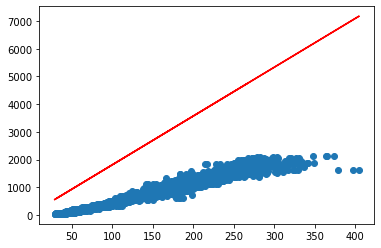

In [45]:
# 일령 - 체중
m = df['area']
n= model1.coef_[0][0] * m + model1.intercept_[0]  

plt.scatter(x= m, y=df['weight'])
plt.plot(m,n, color='red')
plt.show()

# 방법2. 다중 다항회귀 모델

In [34]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("C:/Users/MSDL-DESK-02/Desktop/data_arrange/individual_data.csv")
x = df[['day','area', 'perimeter', 'major_axis']]
y = df[['weight']]
x_tensor = torch.FloatTensor(x.values)
y_tensor = torch.FloatTensor(y.values)
x_train, x_test, y_train, y_test = train_test_split(x_tensor,y_tensor, train_size = 0.8, test_size = 0.2, random_state=12)

# minmax scaling 0~1 사이 범위
#scaler1 = MinMaxScaler(feature_range = (0.0,1.0)) # feature 범위를 0~1사이로 변환 
#scaler1.fit(x_train)
#transformed_x_train = scaler.transform(x_train)

#print(x_train.shape)

# minmax scaling 0~1 사이 범위
#scaler2 = MinMaxScaler(feature_range = (0.0,1.0)) # feature 범위를 0~1사이로 변환 
#scaler2.fit(x_test)
#transformed_x_test = scaler.transform(x_test)

#print(transformed_x_test.shape)

# Create polynomial features up to degree 2
poly1 = PolynomialFeatures(degree=2, include_bias=True)
x_poly1 = poly1.fit_transform(x_train)

# Train the model
regressor = LinearRegression()
regressor.fit(x_poly, y_train)


######################################################################################
#데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=True),LinearRegression())

# Train the model
model_lr.fit(transformed_x_train, y_train)

print("정규화된 x_test의 모양은",transformed_x_test.shape)

# Test the model
y_pred = model_lr.predict(transformed_x_test)
print(mean_absolute_error(y_test, y_pred))

# 모델 저장
import joblib
joblib.dump(model_lr, 'C:/Users/MSDL-DESK-02/Desktop/model/multivariate_polynomiar_regression_model.pkl')

정규화된 x_test의 모양은 (576, 4)
55.69295590342219


['C:/Users/MSDL-DESK-02/Desktop/model/multivariate_polynomiar_regression_model.pkl']